# Satellite Image Visualization for L2 products

## NOAA products

In [1]:
#==================== We set product parameters to download ====================
import os, re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
'''
ABI-L2-DSRF: Downward Shortwave Radiation (1 file per hour)
ABI-L2-ACMF: Clear Sky Mask (6 files per hour)
ABI-L2-TPWF: Total Precipitable Water (6 files per hour)
ABI-L2-RRQPEF: Rainfall rate (6 files per hour)
ABI-L2-LSTF: Land surface temperature (1 files per hour)
'''
product=['ABI-L2-DMWF','ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'
# Select a product and channel to process
selected_product = product[0]
domain = selected_product[-1]
selected_channel = channel[0]
day, month, year = '05', '09', '2023' # Date in dd/mm/yyyy format
hour = '17' # UTC, should be a string number between '00' and '23'

#==================== Building the path to the folder for file storage ====================
FilePath = os.path.join(destination_path,satellite,year, month, day, selected_product,hour)
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP") :
    FilePath = os.path.join(FilePath,channel[0])
print("Processing files in path: {}".format(FilePath))

if os.path.exists(FilePath):
    files = os.listdir(FilePath)
    display(files)
else: print("Directory does not exist.")

Processing files in path: .\GOESimages\goes16\2023\09\05\ABI-L2-DMWF\17


['OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc',
 'OR_ABI-L2-DMWF-M6C07_G16_s20232481700203_e20232481709522_c20232481723384.nc',
 'OR_ABI-L2-DMWF-M6C08_G16_s20232481700203_e20232481709511_c20232481723426.nc',
 'OR_ABI-L2-DMWF-M6C09_G16_s20232481700203_e20232481709517_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C10_G16_s20232481700203_e20232481709523_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C14_G16_s20232481700203_e20232481709511_c20232481723561.nc']

In [2]:
from goespy.Downloader import ABI_Downloader
ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,selected_product,selected_channel)


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


In [3]:
import ipywidgets as widgets

files = os.listdir(FilePath)
files = [file for file in files if file.endswith('.nc')]
print("GOES images available:")
display(files)

# Create dropdown widget with index values of files list
file_selector = widgets.Dropdown(
    options=list(range(len(files))),
    value=0,
    description='Select file:',
)

# Define function to display selected file
def on_file_select(change):
    global selected_index
    selected_index = change['new']
    print(f'Selected file: {files[selected_index]}')

# Call function to display initial file
on_file_select({'new': file_selector.value})

# Link widget selection to function call
file_selector.observe(on_file_select, names='value')
display(file_selector)
FileName = files[selected_index]

GOES images available:


['OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc',
 'OR_ABI-L2-DMWF-M6C07_G16_s20232481700203_e20232481709522_c20232481723384.nc',
 'OR_ABI-L2-DMWF-M6C08_G16_s20232481700203_e20232481709511_c20232481723426.nc',
 'OR_ABI-L2-DMWF-M6C09_G16_s20232481700203_e20232481709517_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C10_G16_s20232481700203_e20232481709523_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C14_G16_s20232481700203_e20232481709511_c20232481723561.nc']

Selected file: OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc


Dropdown(description='Select file:', options=(0, 1, 2, 3, 4, 5), value=0)

In [4]:
from datetime import datetime
# Building image name format
start_date_str = FileName.split("_s")[1][:13]
start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
FullImagePath = os.path.join(FilePath, ImageName)

In [5]:
#==================== Read the dataset and its metadata ====================
import xarray as xr

FullFilePath = os.path.join(FilePath,FileName)
data = xr.open_dataset(FullFilePath, engine='netcdf4')
if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"
data

<xarray.Dataset>
Dimensions:                                                     (
                                                                 nMeasures: 2175646,
                                                                 number_of_image_bounds: 2,
                                                                 number_of_time_bounds: 2,
                                                                 number_of_LZA_bounds: 2,
                                                                 atmospheric_layer: 3,
                                                                 number_atmospheric_layer_bounds: 2,
                                                                 dmw_band: 1,
                                                                 number_of_SZA_bounds: 2)
Coordinates:
    lat                                                         (nMeasures) float64 ...
    lon                                                         (nMeasures) float64 ...
    time                                                        (nMeasures) datetime64[ns] ...
    pressure                                                    (nMeasures) float32 ...
    local_zenith_angle                                          (nMeasures) float32 ...
    solar_zenith_angle                                          (nMeasures) float32 ...
    lat_image                                                   float32 ...
    lon_image                                                   float32 ...
    retrieval_local_zenith_angle                                float32 ...
    atmospheric_layer_pressure                                  (atmospheric_layer) float32 ...
    band_id                                                     (dmw_band) int8 ...
    band_wavelength                                             (dmw_band) float32 ...
Dimensions without coordinates: nMeasures, number_of_image_bounds,
                                number_of_time_bounds, number_of_LZA_bounds,
                                atmospheric_layer,
                                number_atmospheric_layer_bounds, dmw_band,
                                number_of_SZA_bounds
Data variables: (12/35)
    wind_speed                                                  (nMeasures) float32 ...
    wind_direction                                              (nMeasures) float32 ...
    temperature                                                 (nMeasures) float32 ...
    DQF                                                         (nMeasures) float32 ...
    lat_image_bounds                                            (number_of_image_bounds) float32 ...
    lon_image_bounds                                            (number_of_image_bounds) float32 ...
    ...                                                          ...
    percent_uncorrectable_GRB_errors                            float32 ...
    percent_uncorrectable_L0_errors                             float32 ...
    algorithm_dynamic_input_data_container                      int32 ...
    processing_parm_version_container                           int32 ...
    algorithm_product_version_container                         int32 ...
    solar_zenith_angle_bounds                                   (number_of_SZA_bounds) float32 ...
Attributes: (12/34)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    standard_name:             solar_zenith_angle
    units:                     degree
    bounds:                    solar_zenith_angle_bounds
    dataset_name:              OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e2023...
    spatial_resolution:        10km at nadir
    id:                        5724e8b5-304b-4302-881

In [84]:
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

#==================== Getting information from GOES image dataset ====================
import numpy as np
varname = list(data.data_vars.keys())[0]
ImgTime = data.t.values
ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
minute = str(ImgTime.minute).zfill(2)
str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')

spatial_res = data.attrs["spatial_resolution"].split()[0]
spatial_res = float(re.findall('\d+',spatial_res)[0])

LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

print("Variable name: {}\n"
      "Longitude Limits: {} \n"
      "Latitude Limits: {}\n"
      "(LonCenter,LatCenter): {}".format(varname,LonLimits,LatLimits,(LonCenter,LatCenter)))

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')

# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)

# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
if (coords == "lonlat"):
    gproj = data['goes_lat_lon_projection']
    map_proj_geos = ccrs.Geostationary(
                  central_longitude=LonCenter,
                  satellite_height=data.nominal_satellite_height.values*1000,
                  sweep_axis='x',
                  globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                              semimajor_axis=gproj.semi_major_axis, 
                              semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_pc
    map_proj_dst = map_proj_geos
elif (coords == "xy"):
    gproj = data['goes_imager_projection']
    map_proj_geos = ccrs.Geostationary(
                    central_longitude=LonCenter,
                    satellite_height=data.nominal_satellite_height.values*1000,
                    sweep_axis=gproj.sweep_angle_axis,
                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                    semimajor_axis=gproj.semi_major_axis, 
                                    semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_geos
    map_proj_dst = map_proj_pc

Variable name: LST
Longitude Limits: [-156.2995    6.2995] 
Latitude Limits: [-81.3282  81.3282]
(LonCenter,LatCenter): (-75.0, 0.0)


### Transforming array projections with plots

In [85]:
from GOESutils.GOESplots import *
colormaps = definingColormaps()
product_cmap = colormaps[selected_product]

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': <colormaps.colormap.Colormap at 0x26a23763590>,
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <colormaps.colormap.Colormap at 0x26a23744650>,
 'ABI-L2-ACHAF': <colormaps.colormap.Colormap at 0x26a23873450>,
 'ABI-L2-ACHTF': 'jet',
 'ABI-L2-ACTPF': <colormaps.colormap.Colormap at 0x26a23764d90>}

In [53]:
import importlib, sys
importlib.reload(sys.modules['myfunctions.GOESfunctions'])
from myfunctions.GOESfunctions import *

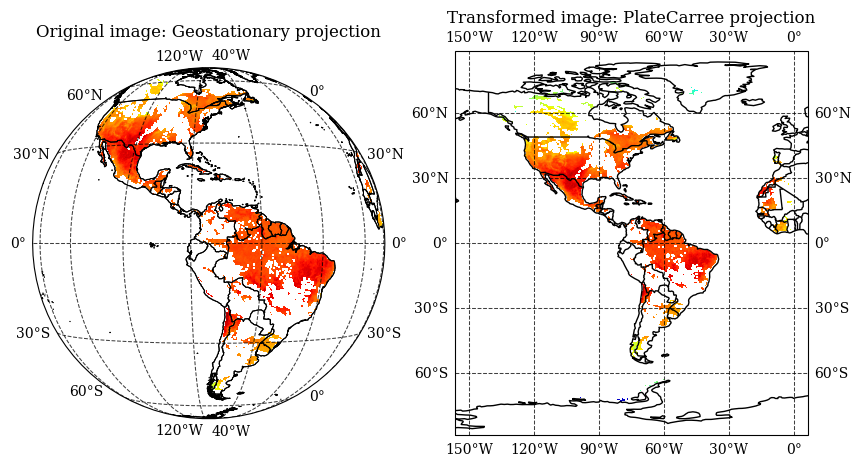

In [86]:
transformed_data, extent_deg = plotBothProjections(data,globals())

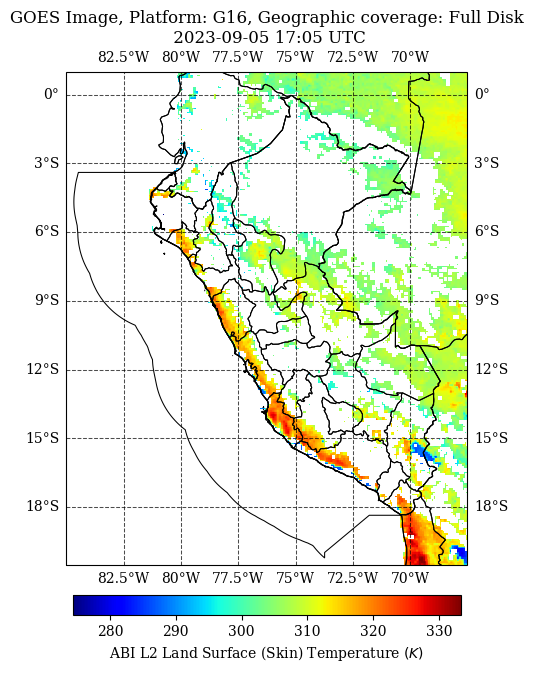

Image 'goes16_2023_09_05_LSTF_17_05.png' saved in '.\GOESimages\goes16\2023\09\05\ABI-L2-LSTF\17'


In [87]:
plotSatImg(data,globals())

# Reports to txt

In [3]:
# Open a new text file in write mode (creates or overwrites the file)
with open('output.txt', 'w') as file:
    file.write("Hello, this is some text that I'm writing to a text file.\n")
    file.write("You can write multiple lines like this.\n")
    file.write("asasasa.\n")

# The file is automatically closed when the 'with' block exits

# GOESimport

In [1]:
#==================== We set product parameters to download ====================
import goes2go as g2g
destination_path = './GOESimages/'
bucket = 'noaa-goes16'
product_list = { # ABI Products
# "ABI-L2-ACHAF": "Cloud Top Height",
# "ABI-L2-ACHTF": "Cloud Top Temperature",
# "ABI-L2-ACMF": "Clear Sky  Mask",
# "ABI-L2-ACTPF": "Cloud Top Phase",
# "ABI-L2-DMWVF": "Derived Motion Winds - Vapor",
# "ABI-L2-DSRF": "Downward Shortwave Radiation",
# "ABI-L2-LSTF": "Land Surface Temperature",
"ABI-L2-RRQPEF": "Rainfall rate",
# "ABI-L2-TPWF": "Total Precipitable Water",
}
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta, timezone
import pytz, os
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

import re
import pandas as pd
import numpy as np
from IPython.display import display, Image, clear_output
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp
import GOESutils.DataBaseUtils as dbu
import importlib, sys

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


In [103]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp
start_date = datetime(2020,1,1,2,tzinfo=utcm5)
end_date = datetime(2020,1,1,3,tzinfo=utcm5)
target_product = list(product_list)[0]
prodFileList = gimp.GOESfiles("timerange", start_date, end_date, freq=timedelta(minutes=30),
                              target_product=["RRQPE", "Rad"], bands=[1, 2 ,3],
                              to_display=True, download=True)

Finished downloading 8 files to [./GOESimages/]
Total Size: 564.13 MB


,file,start,end,creation,product,band,size
0,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:00:21-05:00,2020-01-01 02:09:52-05:00,2020-01-01 02:09:58-05:00,ABI-L1b-RadF,01,8.83 MB
1,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:30:21-05:00,2020-01-01 02:39:52-05:00,2020-01-01 02:39:58-05:00,ABI-L1b-RadF,01,11.06 MB
2,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:00:21-05:00,2020-01-01 02:09:52-05:00,2020-01-01 02:09:56-05:00,ABI-L1b-RadF,02,242.34 MB
3,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:30:21-05:00,2020-01-01 02:39:52-05:00,2020-01-01 02:39:56-05:00,ABI-L1b-RadF,02,247.31 MB
4,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:00:21-05:00,2020-01-01 02:09:52-05:00,2020-01-01 02:09:58-05:00,ABI-L1b-RadF,03,24.77 MB
5,noaa-goes16/ABI-L1b-RadF/2020/001/07/OR_ABI-L1...,2020-01-01 02:30:21-05:00,2020-01-01 02:39:52-05:00,2020-01-01 02:39:58-05:00,ABI-L1b-RadF,03,26.95 MB
6,noaa-goes16/ABI-L2-RRQPEF/2020/001/07/OR_ABI-L...,2020-01-01 02:00:21-05:00,2020-01-01 02:09:52-05:00,2020-01-01 02:10:03-05:00,ABI-L2-RRQPEF,None,1.43 MB
7,noaa-goes16/ABI-L2-RRQPEF/2020/001/07/OR_ABI-L...,2020-01-01 02:40:21-05:00,2020-01-01 02:49:52-05:00,2020-01-01 02:40:03-05:00,ABI-L2-RRQPEF,None,1.44 MB


In [5]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp
gFileList = gimp.GOESfiles("latest", target_product="ABI-L2-MCMIP", to_display=True, download=True)

Finished downloading 1 files to [./GOESimages/]                                                                                                                                                                                                                                                                                                      
Total Size: 233.88 MB


,file,start,end,creation,product,band,size
0,noaa-goes16/ABI-L2-MCMIPF/2023/319/03/OR_ABI-L...,2023-11-14 22:50:20-05:00,2023-11-14 22:59:51-05:00,2023-11-14 22:59:59-05:00,ABI-L2-MCMIPF,None,233.88 MB


Reading file OR_ABI-L2-MCMIPF-M6_G16_s20233190350204_e20233190359518_c20233190359591.nc as geocolor image.
Plotting geocolor image at 2023-11-14 22:59:51.800000-05:00.
It is nighttime! Plotting TrueColor image...


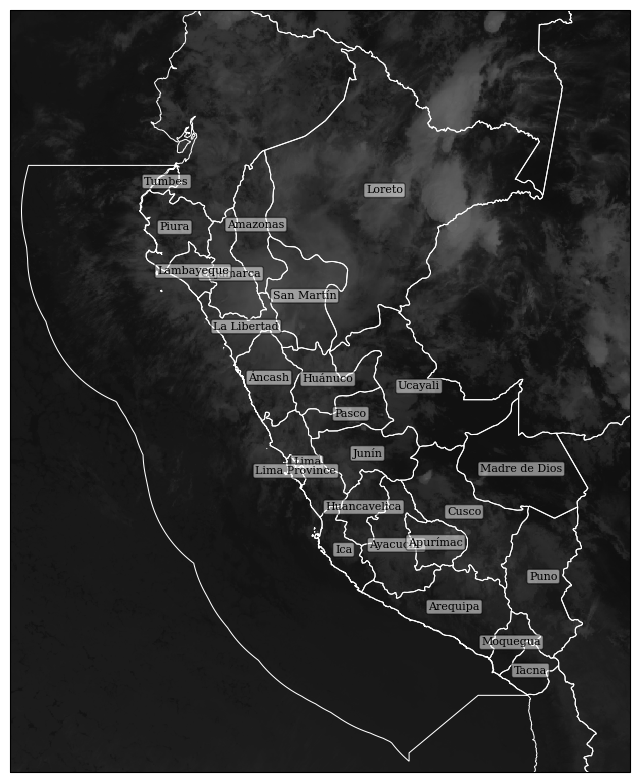

In [6]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp
f = gFileList.iloc[0]
RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,f["file"]))
figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=False, toDisplay=True, toUpload=False, dpi=150)

In [14]:
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESimport as gimp
product = list(product_list)[0]
prodFileList = gimp.GOESfiles("latest", target_product=list(product_list), to_display=True, download=True)
f = prodFileList.iloc[0]
data, ProductParams = gimp.ImportingData(os.path.join(destination_path,f["file"]), product)
data = gimp.CleaningData(data, product)

Finished downloading 1 files to [./GOESimages/]                                                                                                                                                                                                                                                                                                      
Total Size: 1.69 MB


,file,start,end,creation,product,band,size
0,noaa-goes16/ABI-L2-RRQPEF/2023/319/03/OR_ABI-L...,2023-11-14 22:50:20-05:00,2023-11-14 22:59:51-05:00,2023-11-14 22:59:59-05:00,ABI-L2-RRQPEF,None,1.69 MB


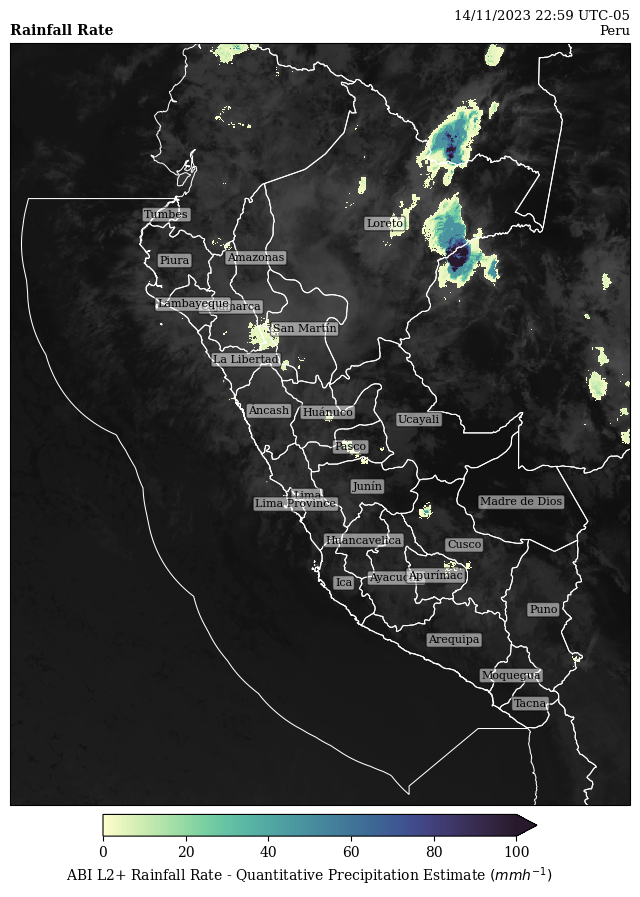

In [7]:
importlib.reload(sys.modules['GOESutils.GOESplots'])
import GOESutils.GOESplots as gplt
figProd = gplt.ProductPlot(data, product, axGeo, ProductParams, toSave=False, toDisplay=True, toUpload=False, dpi=150)

In [15]:
import xarray as xr
import rioxarray as riox
data = data.to_dataset()
data.attrs = ProductParams["DataAttrs"]
data.to_netcdf("data.nc", mode='w')
data_imp = xr.open_dataset("data.nc", engine='rasterio')
data_imp.close()
data_imp.RRQPE.isel(band=0)
# os.remove("data.nc")

# DataBaseUtils

In [1]:
from firebase_admin import credentials, storage, initialize_app, db
import os
import datetime 
import pytz

from dotenv import load_dotenv
load_dotenv(dotenv_path="GOESutils\.env")

# encontrar el key.json
key_path = 'key.json'
if not os.path.exists(key_path):
    key_path = os.path.join("./GOESutils", key_path)
    
cred = credentials.Certificate(key_path)
initialize_app(cred, {'storageBucket': 'eata-project.appspot.com'})

# Especificar URL de la base de datos
db_url = os.getenv("DB_URL")
ref = db.reference(url=db_url) 

def SendComments(tipo,texto):
    """
    Ejemplos:
    enviar("producto_uno","Información sobre el producto uno")
    enviar("producto_dos","Información sobre el producto dos")
    enviar("producto_tres","Información sobre el producto tres")
    enviar("producto_cuatro","Información sobre el producto cuatro")
    enviar("producto_cinco","Información sobre el producto cinco")

    Nota: key.json debe estar dentro de la carpeta Emision
    """
    paragraph = texto
    # Establecer zona horaria de Peru
    peru_tz = pytz.timezone('America/Lima')

    ref.child("comentarios").child(tipo).set({
        'texto': paragraph,
        'fecha': datetime.datetime.now(tz=peru_tz).isoformat()
    })

In [2]:
SendComments("producto_cinco","Información sobre el producto cinco")

# GOESplots

In [1]:
import xarray as xr
import s3fs
fs = s3fs.S3FileSystem(anon=True)

In [59]:
fs.ls("noaa-goes16/ABI-L2-MCMIPF/2023/321", refresh=True)

['noaa-goes16/ABI-L2-MCMIPF/2023/321/00',
 'noaa-goes16/ABI-L2-MCMIPF/2023/321/01',
 'noaa-goes16/ABI-L2-MCMIPF/2023/321/02',
 'noaa-goes16/ABI-L2-MCMIPF/2023/321/03',
 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04']

In [86]:
import GOESutils.GOESimport as gimp
gimp.GOESfiles("latest", target_product="ABI-L2-MCMIP")

Searching for products: ABI-L2-MCMIPF (Press 'esc' to stop)
Looking for product ABI-L2-MCMIPF, set of files from date 17-Nov-2023 05:00 
Total Size: 238.40 MB


,file,start,end,creation,product,band,size
0,noaa-goes16/ABI-L2-MCMIPF/2023/321/05/OR_ABI-L...,2023-11-17 00:00:20-05:00,2023-11-17 00:09:51-05:00,2023-11-17 00:09:59-05:00,ABI-L2-MCMIPF,None,238.40 MB


In [60]:
date = datetime.datetime.utcnow()
fs.ls(f"noaa-goes16/ABI-L2-MCMIPF/{date:%Y/%j/%H/}", refresh=True)

[]

In [64]:
import datetime
date = datetime.datetime.utcnow()

In [66]:
date = datetime.datetime.utcnow()
fs.ls(f"noaa-goes16/ABI-L2-MCMIPF/{date:%Y/%j/%H/}", refresh=True)

[]

In [72]:
#==================== We set product parameters to download ====================
destination_path = './GOESimages/'
product_list = { # ABI Products
"ABI-L2-ACHAF": "Cloud Top Height",
"ABI-L2-ACHTF": "Cloud Top Temperature",
"ABI-L2-ACMF": "Clear Sky  Mask",
"ABI-L2-ACTPF": "Cloud Top Phase",
## "ABI-L2-DMWVF": "Derived Motion Winds - Vapor",
## "ABI-L2-DSRF": "Downward Shortwave Radiation",
"ABI-L2-LSTF": "Land Surface Temperature",
"ABI-L2-RRQPEF": "Rainfall rate",
"ABI-L2-TPWF": "Total Precipitable Water",
}
products = list(product_list)
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta, timezone
import os, pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone
from IPython.display import display, Image, clear_output
import numpy as np
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp
import GOESutils.DataBaseUtils as dbu
from goes2go.data import goes_nearesttime
import importlib, sys
importlib.reload(sys.modules['GOESutils.GOESplots'])
importlib.reload(sys.modules['GOESutils.GOESimport'])
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


In [85]:
from datetime import datetime
import pandas as pd
startdate = datetime.now(utcm5)-timedelta(hours=1)
enddate = datetime.now(utcm5)
startdate = startdate.astimezone(utc)
enddate = enddate.astimezone(utc)
dates = pd.date_range(f"{startdate:%Y-%m-%d %H:00}", f"{enddate:%Y-%m-%d %H:00}", freq="1H")
for date in dates:
    try:
        f = fs.ls(f"noaa-goes16/ABI-L2-MCMIPF/{date:%Y/%j/%H/}", refresh=True)
    except FileNotFoundError:
        date = date - timedelta(minutes=10)
        f = fs.ls(f"noaa-goes16/ABI-L2-MCMIPF/{date:%Y/%j/%H/}", refresh=True)
    print(date.hour)
    print(f)

4
['noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210400205_e20233210409513_c20233210409594.nc', 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210410205_e20233210419519_c20233210419593.nc', 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210420205_e20233210429519_c20233210429591.nc', 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210430205_e20233210439519_c20233210439593.nc', 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210440207_e20233210449515_c20233210449591.nc', 'noaa-goes16/ABI-L2-MCMIPF/2023/321/04/OR_ABI-L2-MCMIPF-M6_G16_s20233210450207_e20233210459515_c20233210459589.nc']
5
['noaa-goes16/ABI-L2-MCMIPF/2023/321/05/OR_ABI-L2-MCMIPF-M6_G16_s20233210500207_e20233210509515_c20233210509595.nc']


In [ ]:
with fs.open(prodFileList.iloc[0]["file"], "rb") as f:
    ds = xr.open_dataset(f, engine='rasterio')

In [ ]:
TifFilesInfo = gplt.QueringGeoColorTif("https://cdn.star.nesdis.noaa.gov/GOES16/ABI/FD/GEOCOLOR/")
TifFilesInfo 

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


Plotting geocolor image at 2023-11-19 04:48:00+00:00.
It is nighttime! Plotting TrueColor image...


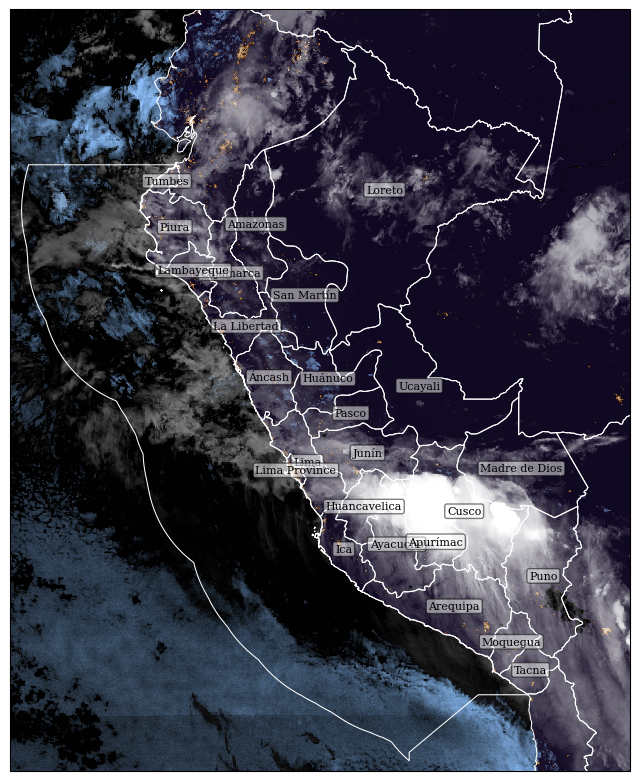

In [1]:
import GOESutils.GOESplots as gplt
ds_peru, GeoColorParams = gplt.GeoColorTif()
figGeo, axGeo = gplt.GeoColorPlot(ds_peru, GeoColorParams, toSave=False, toDisplay=True, toUpload=False, dpi=150)